# 프로젝트 개요

## 유전자 발현 데이터를 활용한 질병 관련 유전자 탐색

본 프로젝트는 GSE16515 유전체 발현 데이터셋을 활용, **췌장암** 환자 세포와 정상 세포 사이에 유전자들의 발현량에 어떤 차이가 있는지 통계적으로 탐색하는 것을 목표로 한다. 생물 데이터의 특성을 이해하고, 통계와 코딩으로 분석하여 의미있는 질병 마커를 찾아낼 것이다.
생물 데이터의 특성을 이해하고, 통계와 코딩으로 분석하여 의미있는 결과를 찾아낼 것.

데이터는 NCBI(미국 국립생물정보센터)의 GEO라는 공공 데이터베이스에서 가져옴.

# 데이터셋 정보 확인 및 문제 정의

## 문제 정의: 파일 불러오기 실패

`pandas` 라이브러리의 `read_csv` 함수를 사용하여 파일 불러오는 과정에서 오류 직면. 일반적으로 CSV 파일은 첫 번째 행에 열 이름이 있고, 그 아래부터 데이터가 시작되므로 특별한 처리 없이 바로 불러올 수 있다고 생각함.
`df=pd.read_csv(file_path)` 코드를 실행한 결과, `ParserError` 발생.

In [1]:
import pandas as pd
import os

# 파일 경로를 지정.
file_path = os.path.join("..", "data", "GSE16515_series_matrix.txt")
df= pd.read_csv(file_path)
df.info()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 10, saw 2


### Raw 데이터 분석(텍스트 파일 형태로 열어 확인)
`ParserError`의 원인을 파악하기 위해 파일을 텍스트 모드로 열어 확인. 다음코드를 이용하여 상위 20줄 출력.

In [ ]:
import pandas as pd
import os

file_path = os.path.join("..", "data", "GSE16515_series_matrix.txt")

with open(file_path, 'r', encoding='utf-8') as f:
    for i in range(20):
        print(f.readline(), end='')

!Series_title	"Expression data from Mayo Clinic Pancreatic Tumor and Normal samples"
!Series_geo_accession	"GSE16515"
!Series_status	"Public on Jun 10 2009"
!Series_submission_date	"Jun 09 2009"
!Series_last_update_date	"Sep 12 2019"
!Series_pubmed_id	"19732725"
!Series_pubmed_id	"27749787"
!Series_pubmed_id	"23936393"
!Series_summary	"We used microarrays to identify the expression differences of FKBP5 gene between the pancreatic tumor and normal samples.On average normal samples had more FKBP5 expression compared to tumor samples"
!Series_overall_design	"This experiment consists of 36 tumor samples and 16 normal samples; a total of 52 samples.  16 samples consist of both tumor and normal expression data, whereas 20 samples consist of only tumor data."
!Series_type	"Expression profiling by array"
!Series_contributor	"Huadong,,Pei"
!Series_contributor	"Liang,,Li"
!Series_contributor	"Brooke,L,Fridley"
!Series_contributor	"Greg,,Jenkins"
!Series_contributor	"Krishna,R,Kalari"
!Series_con

### 오류 원인 분석
`ParserError`는 파일의 구조가 Pandas가 예상하는 CSV형식과 다르다는 것을 의미. 직접 파일을 열어 확인한 결과, 파일 상단에 `#`와 `!`로 시작하는 많은 부가 정보가 존재. Pandas는 이 부가 정보를 데이터의 일부로 잘못 인식하여 오류가 발생함.


`ParserError: Error tokenizing data. C error: Expected 1 fields in line 10, saw 2` : 10번째 줄에 데이터가 1개의 필드로 나뉘어야 하는데 2개의 필드가 발견

따라서 이 부가 정보를 건너뛰고, 실제 데이터가 시작되는 행부터 파일을 읽어와야 한다고 판단함.

### 해결 과정

`!`로 시작하는 메타데이터를 모두 건너뛰고, 실제 데이터가 시작되는 지점부터 파일을 읽도록 코드를 수정.

In [ ]:
import pandas as pd
import os

# 파일 경로를 지정
file_path = os.path.join("..", "data", "GSE16515_series_matrix.txt")

try:
    # '!'로 시작하는 모든 주석 줄을 건너뛰고 데이터를 불러옴.
    df = pd.read_csv(file_path, sep='\t', comment='!', encoding='utf-8')
    print("파일을 성공적으로 불러왔습니다.")
    print(df.head())
    # 데이터 정보 확인
    print("\n--- 데이터프레임 정보 ---")
    df.info()

    # 데이터 통계량 요약
    print("\n--- 데이터프레임 통계 요약 ---")
    print(df.describe())

except FileNotFoundError:
    print(f"오류: '{file_path}' 경로에 파일이 존재하지 않습니다. 경로를 다시 확인해주세요.")
except Exception as e:
    print(f"알 수 없는 오류가 발생했습니다: {e}")   

파일을 성공적으로 불러왔습니다.
      ID_REF  GSM414924  GSM414925  GSM414926  GSM414927  GSM414928  \
0  1007_s_at    1012.00    1191.00    1057.00     698.70     723.20   
1    1053_at      44.32      63.15      63.54      66.59      72.54   
2     117_at      43.03      59.31      39.21      30.39      40.66   
3     121_at      36.65      70.62      42.58     124.30     109.10   
4  1255_g_at       4.92       4.88       5.24       5.33       5.27   

   GSM414929  GSM414930  GSM414931  GSM414932  ...  GSM414966  GSM414967  \
0     560.30     550.50    1110.00     689.60  ...     420.40     961.90   
1      67.29      76.29      93.63      82.81  ...      73.66     154.70   
2      49.92      36.74     855.20      77.85  ...      19.96    1329.00   
3      50.58     134.60      42.23      57.51  ...     225.30      75.76   
4       5.01       5.53       5.07       5.07  ...       5.71       5.20   

   GSM414968  GSM414969  GSM414970  GSM414971  GSM414972  GSM414973  \
0     454.80     684.30    

이제 이 코드를 실행하면 Pandas가 데이터를 성공적으로 불러오는 것을 확인할 수 있음.


# 데이터 로드 및 초기 탐색


이 메타데이터들을 주의 깊게 살펴보며 샘플에 대한 정보를 담고 있을 만한 핵심 키워드, 예를 들어 'Sample', 'Title', 'Description' 등을 탐색. 그 결과, 파일 상단부에서 다음과 같은 결정적인 한 줄을 발견.

`!Sample_title	"Pancreatic Sample 6-Tumor"	"Pancreatic Sample 7-Tumor"	"Pancreatic Sample 1-Tumor" ...`

이 행은 파일의 실제 데이터 테이블과 떨어져 있었지만, 비교를 위해 찾고 있던 **'췌장암'과 '정상 조직'을 구분하는 그룹 정보**를 정확히 담고 있음.



In [ ]:
# 필요한 라이브러리를 불러옴.
import pandas as pd
import os

# 파일 경로를 지정. (scripts 폴더 기준으로 data 폴더를 탐색)
file_path = os.path.join("..", "data", "GSE16515_series_matrix.txt")

print(f"파일 경로: {file_path}")

# 파일을 불러오기 전에 실제 데이터가 시작되는 행을 찾음.
print("데이터 헤더 위치를 찾습니다.")

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        skip_rows = 0
        check=0
        for line in f:
            if check==1:
                pass# print(line)
            if "!Sample_title" in line: # 이 행에 샘플 정보가 담겨 있음
                print(line)
                # skip_rows-=1
                check=1
            
            if 'ID_REF' in line:
                print(line)
                break
            skip_rows += 1
    
    print(f"헤더 행은 {skip_rows}번째 줄에 있습니다. (메타데이터 건너뜀)")
    
except FileNotFoundError:
    print(f"에러: 파일이 존재하지 않습니다. 경로를 확인하십시오.")

# 데이터를 로드합니다.
# 탭으로 구분하고, 메타데이터를 건너뛰며, 헤더를 명확히 지정합니다.
df_raw = pd.read_csv(file_path, sep='\t', skiprows=skip_rows, header=0)

# 데이터프레임 정보와 상위 행을 출력하여 구조를 확인합니다.
# print("\n--- 초기 데이터 구조 확인 ---")
# df_raw.info()
print("\n--- 데이터프레임 상위 5행 ---")
print(df_raw.head())

파일 경로: ..\data\GSE16515_series_matrix.txt
데이터 헤더 위치를 찾습니다.
!Sample_title	"Pancreatic Sample 6-Tumor"	"Pancreatic Sample 7-Tumor"	"Pancreatic Sample 1-Tumor"	"Pancreatic Sample 16-Tumor"	"Pancreatic Sample 16-Normal"	"Pancreatic Sample 53-Tumor"	"Pancreatic Sample 53-Normal"	"Pancreatic Sample 9-Tumor"	"Pancreatic Sample 9-Normal"	"Pancreatic Sample 11-Tumor"	"Pancreatic Sample 11-Normal"	"Pancreatic Sample 12-Tumor"	"Pancreatic Sample 13-Tumor"	"Pancreatic Sample 54-Tumor"	"Pancreatic Sample 54-Normal"	"Pancreatic Sample 15-Tumor"	"Pancreatic Sample 15-Normal"	"Pancreatic Sample 14-Tumor"	"Pancreatic Sample 14-Normal"	"Pancreatic Sample 17-Tumor"	"Pancreatic Sample 20-Tumor"	"Pancreatic Sample 5-Tumor"	"Pancreatic Sample 4-Tumor"	"Pancreatic Sample 4-Normal"	"Pancreatic Sample 19-Tumor"	"Pancreatic Sample 21-Tumor"	"Pancreatic Sample 22-Tumor"	"Pancreatic Sample 23-Tumor"	"Pancreatic Sample 24-Tumor"	"Pancreatic Sample 24-Normal"	"Pancreatic Sample 25-Tumor"	"Pancreatic Sample 25-Norma

`!Sample_title	"Pancreatic Sample 6-Tumor"	"Pancreatic Sample 7-Tumor"	"Pancreatic Sample 1-Tumor"	...`

`!Sample_geo_accession	"GSM414924"	"GSM414925"	"GSM414926"	...`
우선 메타데이터를 살펴서 샘플이 cancer와 normal 중 어떤 그룹에 속하는지 구분을 하기위해 dictionary 자료형을 사용하여 샘플 이름과 번호를 매칭시킨다.


In [ ]:
# 필요한 라이브러리를 불러옴.
import pandas as pd
import os

# 파일 경로를 지정. (scripts 폴더 기준으로 data 폴더를 탐색)
file_path = os.path.join("..", "data", "GSE16515_series_matrix.txt")

sample_info = {}
sample_titles=[]
gsm_ids =[]



with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        if line.startswith("!Sample_geo_accession"):
            # 각 ID와 이름에서 따옴표를 제거해야함 strip('"') 추가, 그냥 진행시 ""로 인해 키값이 매치되지 않음
            gsm_ids = [gsm.strip('"') for gsm in line.strip().split('\t')[1:]]
            print("gsm_ids",gsm_ids)
        if line.startswith("!Sample_title"): 
            sample_titles = [title.strip('"') for title in line.strip().split('\t')[1:]]
            print("sample_titles",sample_titles)
        
        if gsm_ids and sample_titles:
            break

sample_info = dict(zip(gsm_ids,sample_titles))

# 결과확인(일부만 확인)
print({k: sample_info[k] for k in gsm_ids[:3]})

sample_titles ['Pancreatic Sample 6-Tumor', 'Pancreatic Sample 7-Tumor', 'Pancreatic Sample 1-Tumor', 'Pancreatic Sample 16-Tumor', 'Pancreatic Sample 16-Normal', 'Pancreatic Sample 53-Tumor', 'Pancreatic Sample 53-Normal', 'Pancreatic Sample 9-Tumor', 'Pancreatic Sample 9-Normal', 'Pancreatic Sample 11-Tumor', 'Pancreatic Sample 11-Normal', 'Pancreatic Sample 12-Tumor', 'Pancreatic Sample 13-Tumor', 'Pancreatic Sample 54-Tumor', 'Pancreatic Sample 54-Normal', 'Pancreatic Sample 15-Tumor', 'Pancreatic Sample 15-Normal', 'Pancreatic Sample 14-Tumor', 'Pancreatic Sample 14-Normal', 'Pancreatic Sample 17-Tumor', 'Pancreatic Sample 20-Tumor', 'Pancreatic Sample 5-Tumor', 'Pancreatic Sample 4-Tumor', 'Pancreatic Sample 4-Normal', 'Pancreatic Sample 19-Tumor', 'Pancreatic Sample 21-Tumor', 'Pancreatic Sample 22-Tumor', 'Pancreatic Sample 23-Tumor', 'Pancreatic Sample 24-Tumor', 'Pancreatic Sample 24-Normal', 'Pancreatic Sample 25-Tumor', 'Pancreatic Sample 25-Normal', 'Pancreatic Sample 30-T

성공적으로 dict 파일이 만들어 진 것을 확인할 수 있음.


2. 통계 분석이나 머신러닝을 할 때 사용하는 scikit-learn이나 statsmodels 같은 파이썬 라이브러리들은 **'행이 샘플, 열이 특징'** 인 구조의 데이터를 기대하지만, 해당 데이터는 행이 유전자, 열이 샘플인 형태. 때문에 전치가 필요.

위에서 얻은 테이블을 분석하기 좋은 형태로 가공하고 맨 뒤에 group 열을 만들어 암과 정상 샘플을 구분.



## 데이터 전처리 및 가공

통계 분석에 바로 사용할 수 있도록 데이터를 깔끔하게 정리 가공해야함. 현재 데이터는 유전자 발현량과 샘플 정보가 뒤섞여 있어서 그대로 사용하기 어렵기 때문에 다음과 같은 작업을 진행.
1. 샘플 정보 추출: `!Sample_title`이라는 열에서 '췌장암(cancer)'과 '건강한 샘플(control)' 정보를 추출해 별도의 컬럼으로 만들고, 해당 컬럼을 **group**으로 명명.
2. 통계 분석이나 머신러닝을 할 때 사용하는 scikit-learn이나 statsmodels 같은 파이썬 라이브러리들은 **'행이 샘플, 열이 특징'**인 구조의 데이터를 기대하지만, 해당 데이터는 행이 유전자, 열이 샘플인 형태. 때문에 전치가 필요.


**[GSE16515 실제 데이터 구조 예시]**
| ID_REF | GSM414841 | GSM414842 | ... |
| :--- | :--- | :--- | :--- |
| `1007_s_at` | 12.4132 | 8.7654 | ... |
| `1053_at` | 9.8765 | 7.6543 | ... |
| `117_at` | 6.5432 | 9.4321 | ... |


각 구성요소는 다음과 같은 **정확한 의미**를 가짐.

* **`ID_REF`**: 각 유전자의 '이름표'와 같은 **고유 식별자**. `1007_s_at`과 같은 형식은 이 데이터가 측정된 **Affymetrix사의 유전자 칩(GPL570 플랫폼)**에서 사용하는 프로브(Probe) ID로, 특정 유전자의 발현량을 탐지하는 센서의 고유 번호라고 이해할 수 있음.
* **`GSM...`**: GEO 데이터베이스에서 각 **개별 샘플(환자 또는 정상인)에 부여하는 고유 번호**. 예를 들어 `GSM414841`은 하나의 샘플을 의미.
* **`!Sample_title`**: 이 데이터의 가장 큰 특징으로, 샘플이 **'췌장 선암 조직(Pancreatic Adenocarcinoma_T)'**인지 **'정상 췌장 조직(Normal Pancreas_N)'**인지에 대한 핵심적인 그룹 정보가 데이터가 아닌 주석(`!`) 형태의 행에 포함되어 있음.

따라서 본격적인 분석에 앞서, 이 비정형적인 데이터를 Python과 Pandas로 다룰 수 있는 정형 데이터프레임으로 변환하는 **전처리 과정이 필수적**.

In [ ]:
# ID_REF 열을 인덱스로 지정
df_raw.set_index('ID_REF', inplace=True)

# 행과 열을 뒤집기 위해 .T를 사용
df = df_raw.T

df['group'] = df.index.map(sample_info)

# 지금 상태로 들어가면 이름이 복잡해지기 때문에 normal이 포함되면 normal 샘플 아니면 cancer
df['group'] = df['group'].apply(lambda x: 'normal' if 'Normal' in x else 'cancer')

# 결과 확인
df.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at,!series_matrix_table_end,group
GSM414924,1012.0,44.32,43.03,36.65,4.92,151.00,15.61,8.55,124.50,15.22,...,69.29,7.63,40.37,78.23,26.75,557.40,8.35,20.10,NaN,cancer
GSM414925,1191.0,63.15,59.31,70.62,4.88,117.70,34.80,11.19,288.30,11.85,...,71.19,6.84,35.79,114.20,28.67,2390.00,8.94,22.03,NaN,cancer
GSM414926,1057.0,63.54,39.21,42.58,5.24,137.30,20.75,6.67,475.80,11.38,...,96.83,6.77,47.45,95.10,31.02,718.30,9.77,26.59,NaN,cancer
GSM414927,698.7,66.59,30.39,124.30,5.33,72.95,27.98,9.18,97.76,26.39,...,47.52,9.54,34.41,17.48,5.88,95.00,9.22,18.56,NaN,cancer
GSM414928,723.2,72.54,40.66,109.10,5.27,82.80,21.88,7.85,87.25,32.05,...,49.75,9.01,36.08,18.38,12.69,97.14,9.87,24.61,NaN,normal


이런식으로 성공적으로 데이터 전처리가 완료 된 것을 볼 수 있음.

# 데이터 분석

## 탐색적 분석

데이터 전처리는 끝났지만 실제적으로 암과 정상 환자 집단에서 다른 유전자가 있는지 복잡한 분석을 하기 전에 데이터의 전체적인 경향성을 파악하는 탐색적 데이터 분석을 우선 실행.

파일에 약 5만개의 유전자 패턴이 존재하는데 해당 패턴과 같은 변수가 많은 데이터 문제는 **고차원 데이터(High-dimensional data), 차원의 저주** 라고 하며, 보통 이런 복잡한 정보를 **사람이 볼 수 있는 2차원으로 '요약'하거나 '압축'** 하며 가장 유명한 것은 PCA(Principal Component Analysis)로 데이터의 특징을 가장 잘 설명하는 '가장 중요한' 방향이 기존 여러 특징들이 조합되어 만들어진 새로운 '성분'이라는 의미.

`scikit-learn` 하이브러리에서 PCA 기능을 가져와서 진행.

### 데이터 준비하기
PCA는 숫자 데이터에만 적용할 수 있기 때문에 분석한 데이터프레임에서 문자열인 'group'열을 빼고, 숫자들만 남겨야 함. 

추가적으로 각 유전자 열의 크기가 제각각이므로 **표준화** 를 통해 모든 유전자들이 공평하게 비교되도록 스케일을 맞춰줌.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 'group'열 제외한 유전자 데이터만 선택
features = df.columns.drop('group')
x = df[features]

print(f"초기유전자개수:{x.shape[1]}개")

# 표준편차로 나눠주는데 표준편차가 0인 유전자의 경우 에러 발생
zero_std_cols = x.columns[x.std() == 0]

if not zero_std_cols.empty:
    print(f"표준편차가 0인 유전자 열: {len(zero_std_cols)}개 발견, 데이터에서 제외")
    x = x.drop(columns=zero_std_cols)
else:
    print("표준편차 0 인 유전자 없음")

# 결측치(NaN)이 포함된 유전자 제거
x_filtered = x.dropna(axis=1)

# 몇개나 제거 되었나 확인
num_removed_nan_cols = x.shape[1] - x_filtered.shape[1]
if num_removed_nan_cols > 0:
    print(f"결측치가 포함된 유전자 {num_removed_nan_cols}개를 추가로 제거합니다.")

print(f"\n최종 분석 유전자 개수: {x_filtered.shape[1]}개")


# 데이터의 스케일을 표준화
print("스케일링 수행")
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_filtered)

print("스케일링 완료")

초기유전자개수:54614개
표준편차 0 인 유전자 없음
결측치가 포함된 유전자 1개를 추가로 제거합니다.

최종 분석 유전자 개수: 54613개
스케일링 수행
스케일링 완료


## PCA 실행

준비된 데이터를 `scikit-learn`의 PCA 모델에 넣고 실행. 2차원 그래프를 그릴 것이므로, 결과를 2개의 주성분으로 압축하기 위해 `n_components=2` 옵션을 줌.

In [ ]:
from sklearn.decomposition import PCA

# PCA 모델 불러오기
pca = PCA(n_components=2)

# 준비된 데이터를 모델에 넣어 PCA 수행
principalComponents = pca.fit_transform(x_scaled)

## 결과 확인하기

계산 결과는 숫자 덩어리이므로, 이해가 가능한 형태인 그래프로 그려 확인을 함.

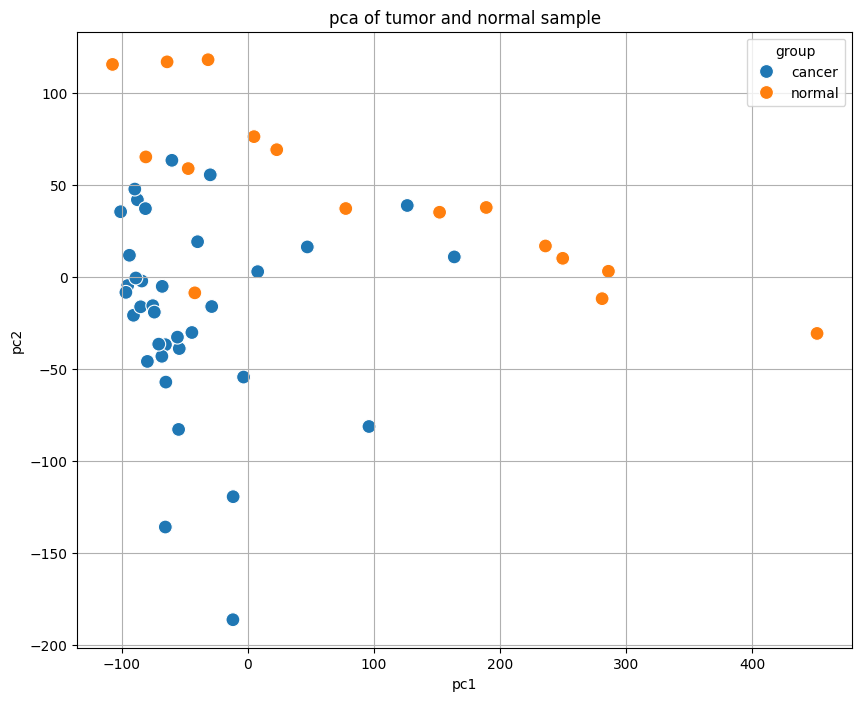

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pc_df = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2'], index = df.index)

# 그룹정보 구분을 위해 'group' 정보 다시붙이기
pc_df['group']= df['group']

# scatter plot 그리기
plt.figure(figsize = (10,8))
sns.scatterplot(x='pc1', y ='pc2',hue='group', data=pc_df , s=100)
plt.title('pca of tumor and normal sample')
plt.grid()
plt.show()

### 탐색적 데이터 분석 - 전체적인 경향성 확인

PCA를 적용한 결과, 위 그래프와 같은 결과를 얻을 수 있는데 이를 바탕으로 몇가지 중요한 경향성을 발견함.

1. 일반적으로 주황색 점(normal)은 파란색 점(cancer) 보다 오른쪽에 위치하고, PC1의 200을 기준으로 나뉘는 경향을 보임
2. pc2값을 기준으로 -40 이하의 샘플들은 모두 암 샘플 이라는 뚜렷한 패턴을 보임.

이처럼 PCA를 통해 두 그룹이 구분되는 명확한 패턴을 가진다는 것을 발견했고, 이는 유전자 발현 데이터에 암과 정상 샘플을 구별할 수 있는 유의미한 정보가 내재되어 있음을 의미. 이를 기반으로 기계 학습 모델을 훈련하면 높은 정확도로 두 그룹을 분류할 수 있을거라 판단.

## 머신러닝 모델링 : 췌장암 예측 모델 구측
PCA 분석을 통해 확인된 두 그룹 간의 패턴은, 기계 학습 모델이 이 데이터를 성공적으로 학습할 수 있는 근거. 이 데이터를 활용하여 췌장암 여부를 예측하는 분류 모델을 직접 구축하고, 그 성능을 객관적으로 평가.

1. 데이터 분할(train/test)
   
먼저, 모델의 성능을 공정하게 평가하기 위해 전체 데이터를 훈령용(train)과 테스트용(test)으로 분할. 훈련용 데이터로 모델을 학습하고, 모델이 본 적 없는 데이터인 테스트용 데이터로 얼마나 정답을 잘 맞추는지 확인.

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='group')
y = df['group']

# stratify = y 를 이용해 'group'열에 담긴 cancer/normal 라벨의 비율을 확인하고 훈련용과 테스트용 데이터를 나눌 때 원본 데이터의 클래스 비율을 그대로 유지시켜줌
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42, stratify=y)

print(f"훈련용 데이터:{x_train.shape}")
print(f"테스트용 데이터: {x_test.shape}")

훈련용 데이터:(41, 54614)
테스트용 데이터: (11, 54614)


2. 모델 학습 및 평가

분류 문제에서 안정적이고 높은 성능을 보이는 랜덤 포레스트(Random Forest) 모델을 사용하여 학습 및 평가 진행.

              precision    recall  f1-score   support

      cancer       1.00      0.88      0.93         8
      normal       0.75      1.00      0.86         3

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



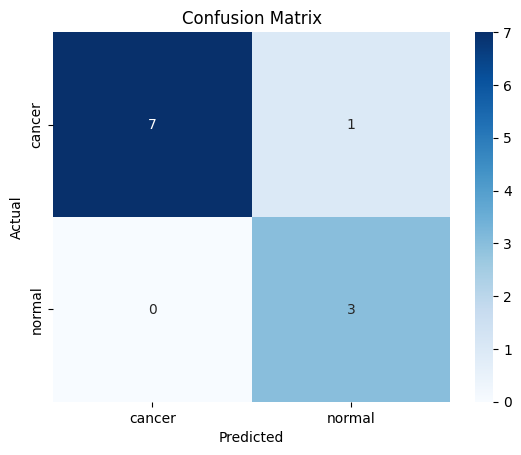

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

predictions = model.predict(x_test)

print(classification_report(y_test,predictions))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['cancer','normal'], yticklabels = ['cancer','normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 모델 성능 개선: '재현율(Recall)' 최적화

`classification_report`와 혼돈 행렬을 통해 1차 모델의 성능을 확인함. ('cancer'와 'normal'의 순서는 알파뱃 순)

혼돈 행렬을 자세히 살펴보면, 모델이 **실제 암(cancer)** 환자를 **정상(normal)**으로 잘못 예측하는 치명적인 실수(False Negative, FN)가 1건 발견.

일반적인 분석에서는 이 정도의 정확도도 만족스러울 수 있으나, 췌장암과 같은 의료 분야에서는 정확도(Accuracy)보다 **실제 암 환자 중 몇 명을 암이라고 제대로 찾아냈는가**를 의미하는 **재현율(Recall)** 지표를 100%로 만드는 것이 훨씬 더 중요.

따라서 해당 모델이 암 환자를 놓치지 않도록 매우 민감하게 반응하도록 모델을 개선하는 2차 시도를 진행.

이를 위해 모델이 암을 정상으로 예측하는 실수를 다른 실수보다 훨씬 더 심각하게 받아들이도록 만들 방법을 탐색.

gpt와 gemini같은 생성형 AI를 통해 특정 결과에 대해 penalty(벌점)을 주는 방식을 착안하여, `scikit-learn`의 `RandomForestClassifier` 문서를 탐색한 결과, `class_weight`라는 파라미터를 발견.
`class_weight`는 `dict` 자료형을 사용해 `{class_label: weight}` 형태로 특정 클래스에 가중치를 직접 부여할 수 있음. (예: `{'cancer':10, 'normal':1}`)

`'blanced'`라는 값을 설정하면, 데이터 클래스 비율에 
